In [1]:
#Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn import cluster
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale,RobustScaler,StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [2]:
#Import the dataset
obesity = pd.read_csv("C:\\Users\\babul\\Downloads\\ObesityDataSet.csv")

In [3]:
#make copy of obesity dataset
obesity2 = obesity.copy()

In [4]:
# How many rows and columns are there
obesity.shape
obesity.columns


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [5]:
# Check for missing values
obesity.isnull().any().any()

False

In [6]:
#Check dataset info
obesity.info()
obesity.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
#Create BMI variable
obesity['BMI'] = obesity['Weight']/(obesity['Height']**2)

In [8]:
#Check dataset first rows
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


C:\Users\babul\AppData\Local\Temp\ipykernel_34928\2691561458.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(obesity["Weight"], ax=axes[0]).set(xlabel='Weight,kg', title='Distribution of Weight')
C:\Users\babul\AppData\Local\Temp\ipykernel_34928\2691561458.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

[Text(0.5, 22.549999999999997, 'Age, years'),
 Text(0.5, 1.0, 'Distribution of Age')]

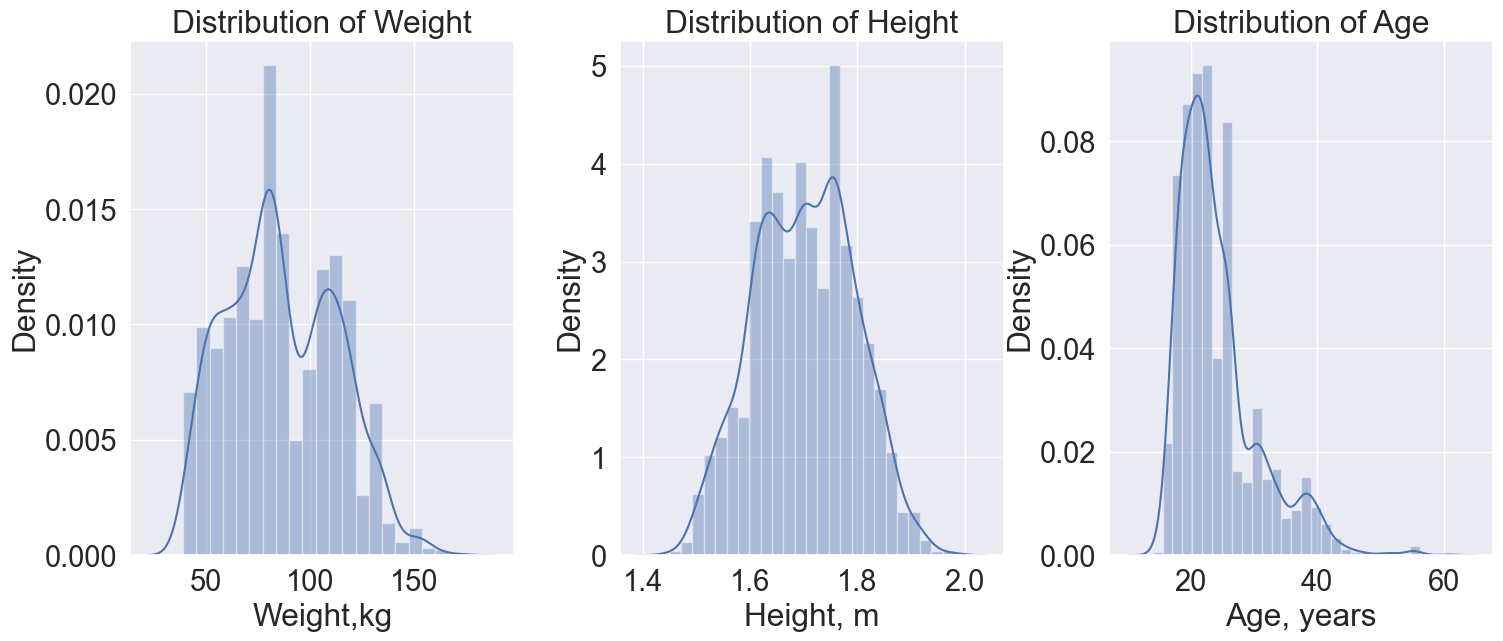

In [9]:
#Examine distribution of numerical variables
sns.set(font_scale=1.9)
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15, 6.3)) 
fig.tight_layout(pad=1.0)
sns.distplot(obesity["Weight"], ax=axes[0]).set(xlabel='Weight,kg', title='Distribution of Weight')
sns.distplot(obesity["Height"], ax=axes[1]).set(xlabel="Height, m", title='Distribution of Height')
sns.distplot(obesity["Age"], ax=axes[2], bins=30).set(xlabel="Age, years", title='Distribution of Age')



[Text(0.5, 44.249999999999986, 'Age, years'),
 Text(0.5, 1.0, 'Distribution of Age')]

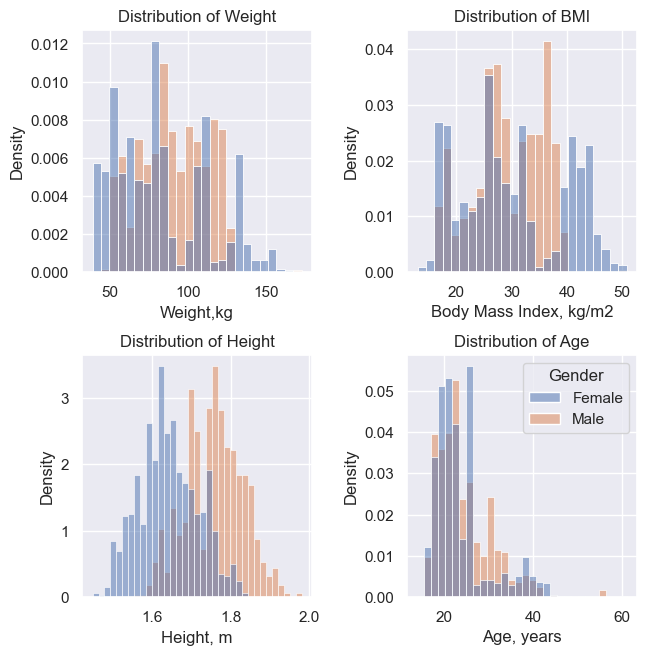

In [10]:
#Examine distribution of numerical variables
sns.set(font_scale=1)
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(7, 7)) 
fig.tight_layout(pad=3.0)
sns.histplot(obesity, x='Weight', hue='Gender',stat='density', bins=25,ax=axes[0,0], legend=False).set(xlabel='Weight,kg', title='Distribution of Weight')
sns.histplot(obesity, x='BMI', hue='Gender',stat='density', bins=25,ax=axes[0,1], legend=False).set(xlabel='Body Mass Index, kg/m2', title='Distribution of BMI')
sns.histplot(obesity, x='Height', hue='Gender',stat='density', bins=35,ax=axes[1,0], legend=False).set(xlabel="Height, m", title='Distribution of Height')
sns.histplot(obesity, x='Age', hue='Gender',stat='density', bins=30,ax=axes[1,1]).set(xlabel="Age, years", title='Distribution of Age')

In [11]:
#Calculate medians for numerical variables
p = obesity.groupby(["Gender"])["Weight"].median("Weight").reset_index()
print(p)
h = obesity.groupby(["Gender"])["Height"].median("Height").reset_index()
print(h)
b = obesity.groupby(["Gender"])["BMI"].median("BMI").reset_index()
print(b)
f = obesity.loc[obesity['BMI'] >= 40].groupby("Gender").size().reset_index(name='counts')
print(f)
g=obesity.groupby("Gender").size().reset_index(name='counts')
print(g)
print("persentage BMI>=40 for men")
print((1/1068)*100)
print("persentage BMI>=40 for women")
print((267/1043)*100)
print('median age')
print(obesity.Age.median())

   Gender    Weight
0  Female  78.00000
1    Male  89.94547
   Gender    Height
0  Female  1.639524
1    Male  1.760000
   Gender        BMI
0  Female  28.465346
1    Male  28.905612
   Gender  counts
0  Female     267
1    Male       1
   Gender  counts
0  Female    1043
1    Male    1068
persentage BMI>=40 for men
0.09363295880149813
persentage BMI>=40 for women
25.599232981783317
median age
22.77789


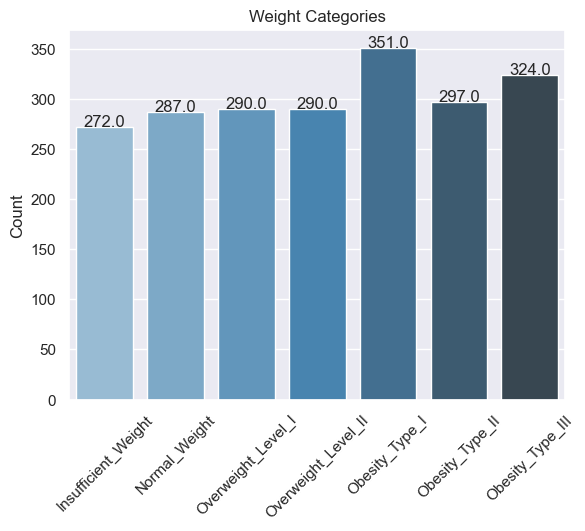

In [12]:
#Check how many people in each weight group
ax=sns.barplot(x=obesity.NObeyesdad.value_counts().index, y=obesity.NObeyesdad.value_counts(),palette='Blues_d', order=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.setp(ax.get_xticklabels(), rotation=45)
plt.ylabel('Count')
plt.xlabel("")
plt.title("Weight Categories")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

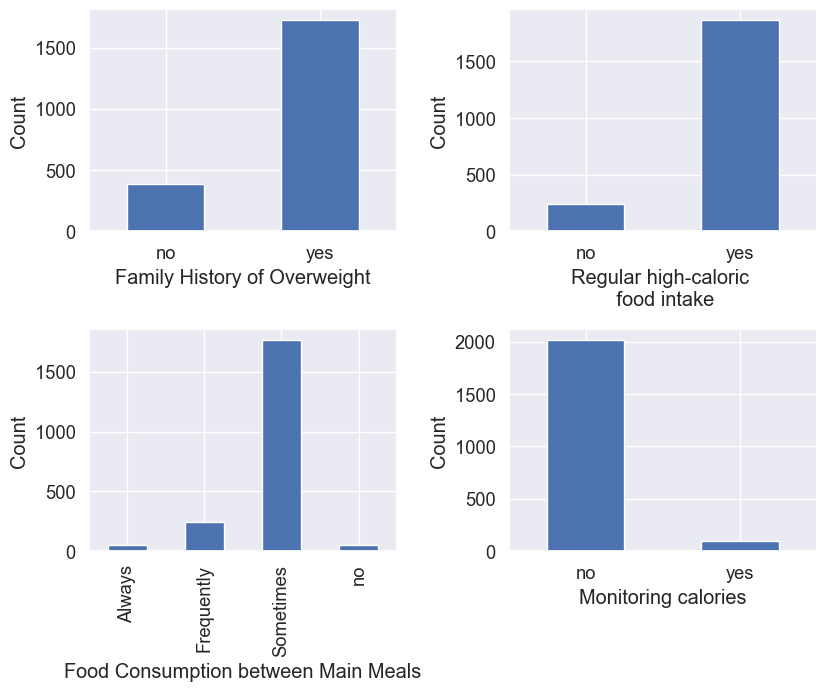

In [13]:
#check counts of categorical variables.
sns.set(font_scale=1.2)
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(9, 7))
fig.tight_layout(pad=3.0)

#create boxplot in each subplot
ax=obesity.groupby(['family_history_with_overweight']).size().plot(kind='bar',ylabel="Count",xlabel="Family History of Overweight",ax=axes[0,0],rot=0)
ax1=obesity.groupby(['FAVC']).size().plot(kind='bar',ylabel="Count",xlabel="Regular high-caloric \n food intake", ax=axes[0,1],rot=0)
ax2=obesity.groupby(['CAEC']).size().plot(kind='bar',ylabel="Count",xlabel="Food Consumption between Main Meals",ax=axes[1,0])
ax3=obesity.groupby(['SCC']).size().plot(kind='bar',ylabel="Count",xlabel="Monitoring calories", ax=axes[1,1],rot=0)

plt.show()


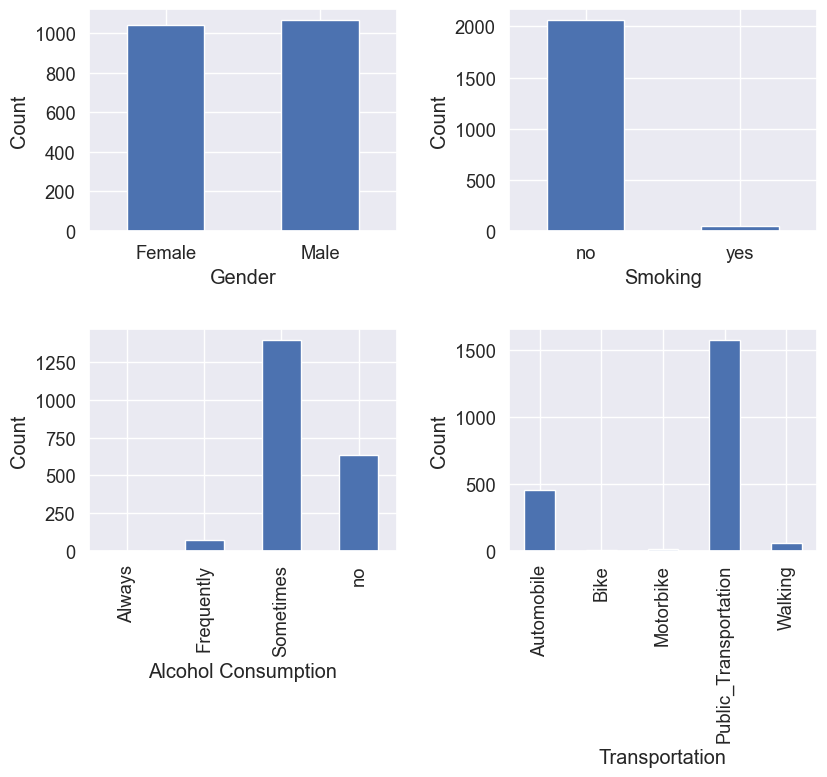

In [14]:
#check counts of categorical variables.
sns.set(font_scale=1.2)
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(9, 7))
fig.tight_layout(pad=3.0)

#create boxplot in each subplot

ax1=obesity.groupby(['Gender']).size().plot(kind='bar',ylabel="Count",xlabel='Gender', ax=axes[0,0],rot=0)
ax2=obesity.groupby(['SMOKE']).size().plot(kind='bar',ylabel="Count",xlabel='Smoking', ax=axes[0,1],rot=0)
ax3=obesity.groupby(['CALC']).size().plot(kind='bar',ylabel="Count",xlabel="Alcohol Consumption", ax=axes[1,0])
ax4=obesity.groupby(['MTRANS']).size().plot(kind='bar',ylabel="Count",xlabel="Transportation", ax=axes[1,1])

plt.show()

In [15]:
#How many people in each subgroup
s = obesity.groupby("SMOKE").size().reset_index(name='counts')
print(s)
a = obesity.groupby("CALC").size().reset_index(name='counts')
print(a)
t = obesity.groupby("MTRANS").size().reset_index(name='counts')
print(t)

  SMOKE  counts
0    no    2067
1   yes      44
         CALC  counts
0      Always       1
1  Frequently      70
2   Sometimes    1401
3          no     639
                  MTRANS  counts
0             Automobile     457
1                   Bike       7
2              Motorbike      11
3  Public_Transportation    1580
4                Walking      56


<Axes: xlabel='Physical Activity, days per week'>

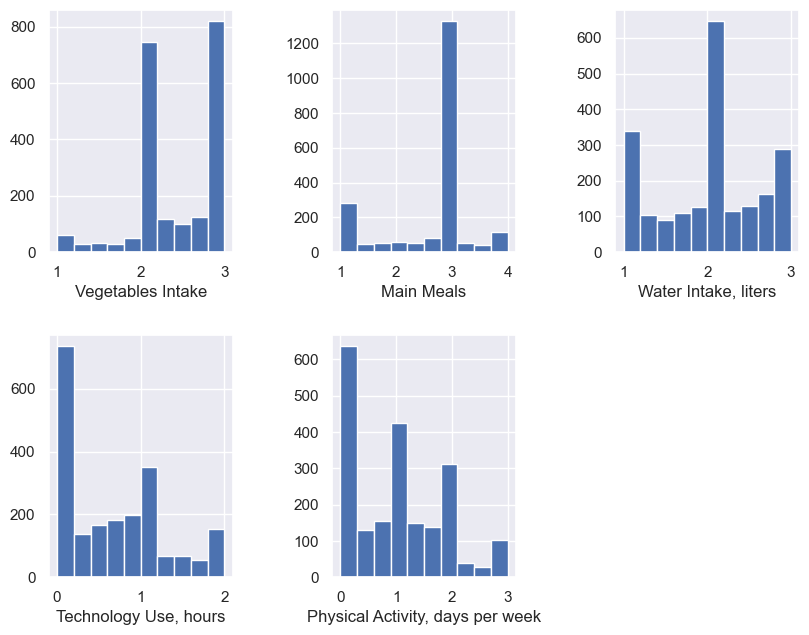

In [16]:
#Distribution of categorical variables, that were coded a numerical.
sns.set(font_scale=1)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3,figsize=(9, 7))
fig.tight_layout(pad=3.0)
fig.delaxes(ax6)
ax1.set_xlabel("Vegetables Intake")
ax2.set_xlabel('Main Meals')
ax3.set_xlabel("Water Intake, liters")
ax4.set_xlabel("Technology Use, hours")
ax5.set_xlabel("Physical Activity, days per week")
obesity['FCVC'].hist(ax=ax1)
obesity['NCP'].hist(ax=ax2)
obesity['CH2O'].hist(ax=ax3)
obesity['TUE'].hist(ax=ax4)
obesity['FAF'].hist(ax=ax5)


Text(0.5, 1.0, 'Obesity by Age')

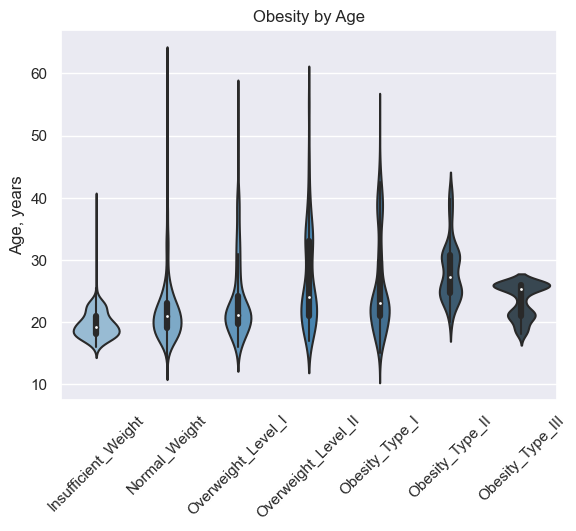

In [17]:
#Obesity vs Age violin plot
ax=sns.violinplot(x='NObeyesdad', y='Age', data=obesity, palette='Blues_d', order=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.setp(ax.get_xticklabels(), rotation=45)
plt.ylabel('Age, years')
plt.xlabel("")
plt.title("Obesity by Age")

Text(0.5, 0, 'Body Mass Index, kg/m2')

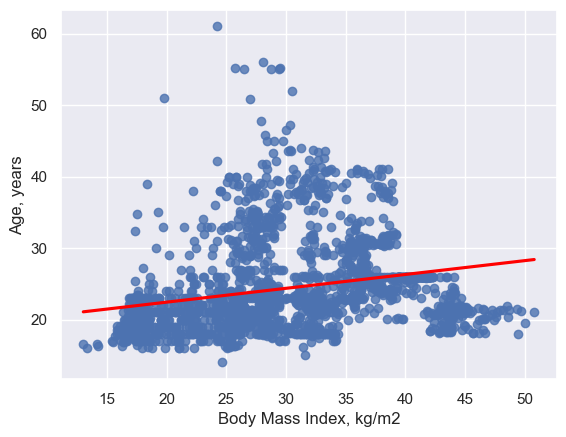

In [18]:
#Scattegram of BMS and Age
ax1=sns.regplot(x=obesity['BMI'], y=obesity['Age'], line_kws={"color": "red"}, ci=None)
plt.ylabel('Age, years')
plt.xlabel("Body Mass Index, kg/m2")


Text(0.5, 0, 'Body Mass Index, kg/m2')

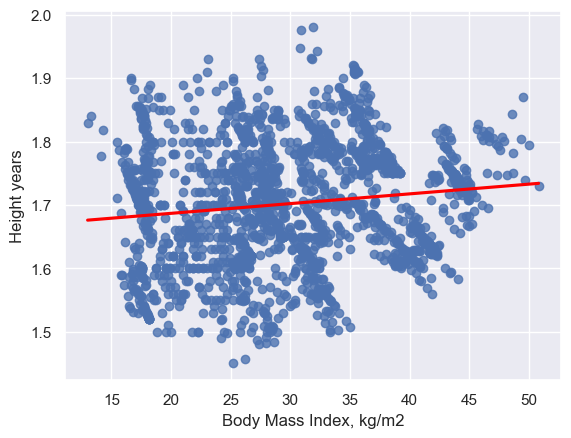

In [19]:
#Scattegram of BMS and Height
ax=sns.regplot(x=obesity['BMI'], y=obesity['Height'], line_kws={"color": "red"}, ci=None)
plt.ylabel('Height years')
plt.xlabel("Body Mass Index, kg/m2")

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Automobile'),
  Text(1, 0, 'Public_Transportation'),
  Text(2, 0, 'Motorbike'),
  Text(3, 0, 'Bike'),
  Text(4, 0, 'Walking')])

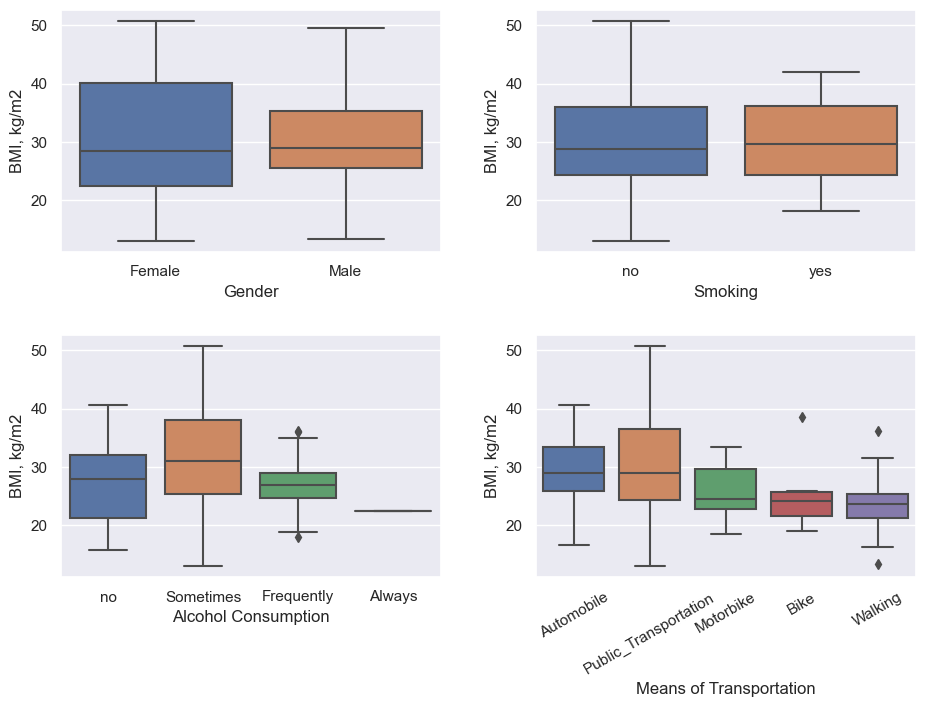

In [20]:
#Boxplots of BMI #1
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10, 7)) # create 2x2 array of subplots
fig.tight_layout(pad=3.0)

#create boxplot in each subplot
sns.boxplot(data=obesity, x="Gender", y="BMI", ax=axes[0,0]).set(ylabel='BMI, kg/m2')
sns.boxplot(data=obesity, x="SMOKE", y="BMI", ax=axes[0,1]).set(xlabel='Smoking', ylabel='BMI, kg/m2')
sns.boxplot(data=obesity, x="CALC", y="BMI", ax=axes[1,0]).set(xlabel='Alcohol Consumption', ylabel='BMI, kg/m2')
sns.boxplot(data=obesity, x="MTRANS", y="BMI", ax=axes[1,1], order=['Automobile', 'Public_Transportation','Motorbike', 'Bike', 'Walking']).set(xlabel='Means of Transportation', ylabel='BMI, kg/m2')


plt.xticks(rotation=30)


In [21]:
#Calculate median and IQR for Boxplots of BMI #1
g = obesity.groupby(["Gender"])["BMI"].agg(['min', 'max','median', "count"]).reset_index()
print(g)
s = obesity.groupby(["SMOKE"])["BMI"].agg(['min', 'max','median', "count"]).reset_index()
print(s)
a = obesity.groupby(["CALC"])["BMI"].agg(['min', 'max','median', "count"]).reset_index()
print('Alcohol Consumption \n', a)
t = obesity.groupby(["MTRANS"])["BMI"].agg(['min', 'max','median', "count"]).reset_index()
print('Transportation \n',t)

print(obesity.groupby(["Gender"])["BMI"].quantile([0.25, 0.75]).reset_index())
print(obesity.groupby(["SMOKE"])["BMI"].quantile([0.25, 0.75]).reset_index())
print('Alcohol Consumption \n', obesity.groupby(["CALC"])["BMI"].quantile([0.25, 0.75]).reset_index())
print('Transportation \n',obesity.groupby(["MTRANS"])["BMI"].quantile([0.25, 0.75]).reset_index())


   Gender        min        max     median  count
0  Female  12.998685  50.811753  28.465346   1043
1    Male  13.291588  49.472390  28.905612   1068
  SMOKE        min        max     median  count
0    no  12.998685  50.811753  28.716393   2067
1   yes  18.218322  41.913215  29.693671     44
Alcohol Consumption 
          CALC        min        max     median  count
0      Always  22.491349  22.491349  22.491349      1
1  Frequently  17.941817  36.157025  26.920736     70
2   Sometimes  12.998685  50.811753  30.923746   1401
3          no  15.792641  40.644506  27.972600    639
Transportation 
                   MTRANS        min        max     median  count
0             Automobile  16.648614  40.644506  28.981143    457
1                   Bike  18.938776  38.530612  24.212293      7
2              Motorbike  18.518519  33.333333  24.444444     11
3  Public_Transportation  12.998685  50.811753  28.982942   1580
4                Walking  13.291588  36.131267  23.601955     56
   Gend

[Text(0.5, 44.249999999999986, 'Monitoring calories'),
 Text(507.72727272727263, 0.5, 'BMI, kg/m2')]

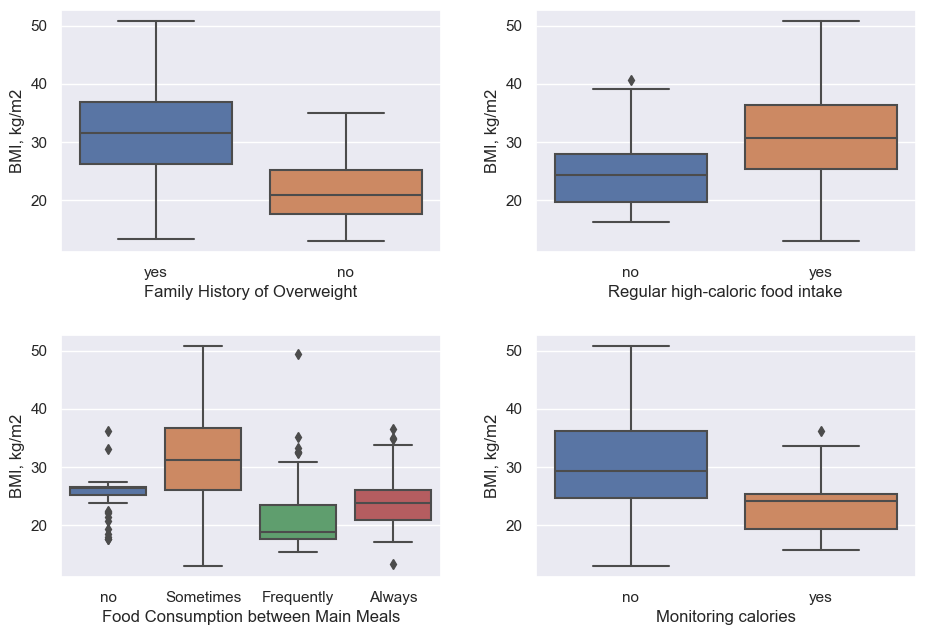

In [22]:
#Boxplots of BMI #2
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10, 7)) # create 2x2 array of subplots
fig.tight_layout(pad=3.0)


#create boxplot in each subplot
sns.boxplot(data=obesity, x="family_history_with_overweight", y="BMI", ax=axes[0,0]).set(xlabel="Family History of Overweight", ylabel='BMI, kg/m2')
sns.boxplot(data=obesity, x="FAVC", y="BMI", ax=axes[0,1]).set(xlabel='Regular high-caloric food intake', ylabel='BMI, kg/m2')
sns.boxplot(data=obesity, x="CAEC", y="BMI", ax=axes[1,0], order=['no', 'Sometimes','Frequently', 'Always']).set(xlabel='Food Consumption between Main Meals', ylabel='BMI, kg/m2')
sns.boxplot(data=obesity, x="SCC", y="BMI", ax=axes[1,1]).set(xlabel='Monitoring calories', ylabel='BMI, kg/m2')



In [23]:
#Calculate median and IQR for Boxplots of BMI #2
f = obesity.groupby(["family_history_with_overweight"])["BMI"].agg(['min', 'max','median', "count"]).reset_index()
print(f)
c = obesity.groupby(["FAVC"])["BMI"].agg(['min', 'max','median', "count"]).reset_index()
print('Regular high-caloric food intake \n', c)
m = obesity.groupby(["CAEC"])["BMI"].agg(['min', 'max','median', "count"]).reset_index()
print('Food Consumption between Main Meals \n', m)
mc = obesity.groupby(["SCC"])["BMI"].agg(['min', 'max','median', "count"]).reset_index()
print('Monitoring calories \n',mc)

print(obesity.groupby(["family_history_with_overweight"])["BMI"].quantile([0.25, 0.75]).reset_index())
print('Regular high-caloric food intake \n', obesity.groupby(["FAVC"])["BMI"].quantile([0.25, 0.75]).reset_index())
print('Food Consumption between Main Meals \n', obesity.groupby(["CAEC"])["BMI"].quantile([0.25, 0.75]).reset_index())
print('Monitoring calories \n', obesity.groupby(["SCC"])["BMI"].quantile([0.25, 0.75]).reset_index())


  family_history_with_overweight        min        max     median  count
0                             no  12.998685  35.003199  21.007668    385
1                            yes  13.291588  50.811753  31.587746   1726
Regular high-caloric food intake 
   FAVC        min        max     median  count
0   no  16.229206  40.644506  24.419279    245
1  yes  12.998685  50.811753  30.668455   1866
Food Consumption between Main Meals 
          CAEC        min        max     median  count
0      Always  13.291588  36.523009  23.781213     53
1  Frequently  15.432099  49.472390  18.858540    242
2   Sometimes  12.998685  50.811753  31.220499   1765
3          no  17.578125  36.157025  26.413626     51
Monitoring calories 
    SCC        min        max     median  count
0   no  12.998685  50.811753  29.303652   2015
1  yes  15.792641  36.157025  24.191901     96
  family_history_with_overweight  level_1        BMI
0                             no     0.25  17.581492
1                           

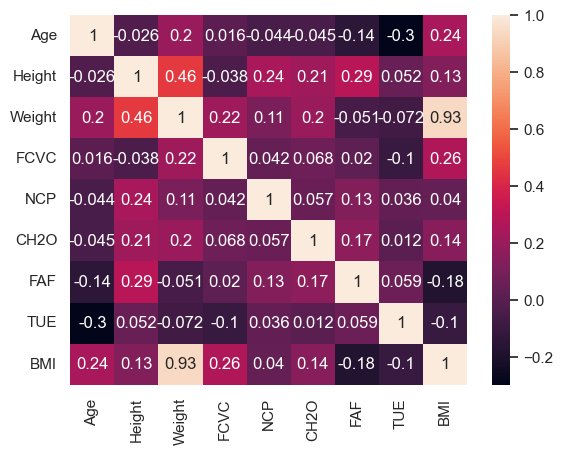

In [24]:
# Correlation for only numerical data
corr = obesity.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True)
plt.show()

In [25]:
#Separate categorical variables
categorical_features = obesity2.select_dtypes(exclude=['floating'])
numerical_features = obesity2.select_dtypes(include=['floating'])
categorical_features.info()
numerical_features.info()
numerical_features.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Gender                          2111 non-null   object
 1   family_history_with_overweight  2111 non-null   object
 2   FAVC                            2111 non-null   object
 3   CAEC                            2111 non-null   object
 4   SMOKE                           2111 non-null   object
 5   SCC                             2111 non-null   object
 6   CALC                            2111 non-null   object
 7   MTRANS                          2111 non-null   object
 8   NObeyesdad                      2111 non-null   object
dtypes: object(9)
memory usage: 148.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age    

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


In [26]:
#recode categorical features
categorical_features['Gender'] = categorical_features['Gender'].map({'Female':0, 'Male':1})
categorical_features['family_history_with_overweight'] = categorical_features['family_history_with_overweight'].map({'no':0, 'yes':1})
categorical_features['CAEC'] = categorical_features['CAEC'].map({'no':0, 'Sometimes':1,'Frequently':2, 'Always':3 })
categorical_features['FAVC'] = categorical_features['FAVC'].map({'no':0, 'yes':1})
categorical_features['SMOKE'] = categorical_features['SMOKE'].map({'no':0, 'yes':1})
categorical_features['SCC'] = categorical_features['SCC'].map({'no':0, 'yes':1})
categorical_features['CALC'] = categorical_features['CALC'].map({'no':0, 'Sometimes':1,'Frequently':2, 'Always':3 })
categorical_features['MTRANS'] = categorical_features['MTRANS'].map({'Automobile':0, 'Public_Transportation':1,'Motorbike':2, 'Bike':3, 'Walking':4})
categorical_features['NObeyesdad'] = categorical_features['NObeyesdad'].map({'Insufficient_Weight':0, 'Normal_Weight':1,'Overweight_Level_I':2, 'Overweight_Level_II':3, 'Obesity_Type_I':4, 'Obesity_Type_II':5, 'Obesity_Type_III':6})


,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
Gender,1.000000,0.102512,0.064934,-0.113986,0.044698,-0.102633,-0.012682,-0.102529,-0.037011
family_history_with_overweight,0.102512,1.000000,0.208036,-0.185637,0.017385,-0.185422,-0.036688,-0.117989,0.500264
FAVC,0.064934,0.208036,1.000000,-0.162138,-0.050660,-0.190658,0.098976,-0.117512,0.249962
CAEC,-0.113986,-0.185637,-0.162138,1.000000,0.052505,0.105738,-0.076480,0.083441,-0.352752
SMOKE,0.044698,0.017385,-0.050660,0.052505,1.000000,0.047731,0.076050,-0.002233,0.003250
SCC,-0.102633,-0.185422,-0.190658,0.105738,0.047731,1.000000,-0.002317,0.062015,-0.194482
CALC,-0.012682,-0.036688,0.098976,-0.076480,0.076050,-0.002317,1.000000,0.005996,0.168379
MTRANS,-0.102529,-0.117989,-0.117512,0.083441,-0.002233,0.062015,0.005996,1.000000,-0.022350
NObeyesdad,-0.037011,0.500264,0.249962,-0.352752,0.003250,-0.194482,0.168379,-0.022350,1.000000


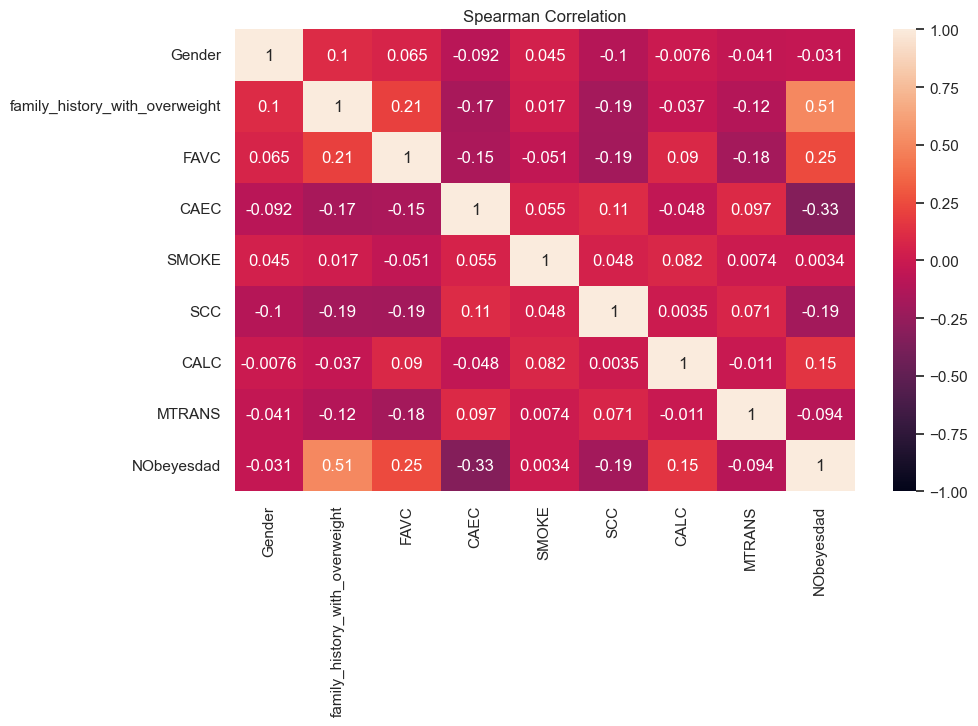

In [27]:
#Sperman correlation for categorical variables
def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)
display_correlation(categorical_features)